In [1]:
import os
import h5py
import cv2
from tqdm import tqdm
import matplotlib
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET

ROOT_DIR = os.path.abspath("../../")

DATA_DIR = os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg")
RAW_DATA_DIR = os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw")

In [2]:
file_names = os.listdir(DATA_DIR)

# for file_name in tqdm(file_names, ascii=True):

file = h5py.File(os.path.join(DATA_DIR, file_names[0]))
file_2 = h5py.File(os.path.join(DATA_DIR, file_names[2]))
coords = file['coords']

data = file_2['data']
labels = file_2['label']

/home/kamil/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """
/home/kamil/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


/home/kamil/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


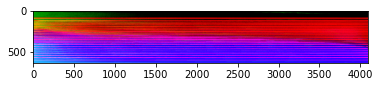

In [3]:
plt.imshow(data.value[:, :, 9:12])

In [4]:
print(file.keys())
print(file_2.keys())

<KeysViewHDF5 ['coords']>
<KeysViewHDF5 ['data', 'label']>


/home/kamil/anaconda3/envs/Mask_RCNN/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


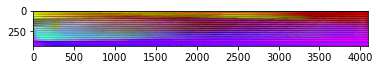

In [5]:
plt.imshow(coords.value)


In [6]:
import numpy as np
from plyfile import PlyData

# raw_data = np.load(os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw/scenenn_dec24_data/005/005.ply"), allow_pickle=True)
plydata = PlyData.read(os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw/scenenn_dec24_data/train/005/005.ply"))


In [7]:
vertex = plydata['vertex']

x = vertex['x']
y = vertex['y']
z = vertex['z']

nx = vertex['nx']
ny = vertex['ny']
nz = vertex['nz']

xs = (vertex['x'] * 100).astype(np.int)
ys = (vertex['y'] * 100).astype(np.int)
zs = (vertex['z'] * 100).astype(np.int)

red = vertex['red']
green = vertex['green']
blue = vertex['blue']

print(vertex['red'].shape)
print(vertex['x'].shape)
print(vertex['y'].shape)
rgb = np.transpose(np.array([red, green, blue])) / 255

print(x.max(), y.max(), z.max())
print(nx.max(), ny.max(), nz.max())
print(xs.max(), ys.max(), zs.max())

(1758578,)
(1758578,)
(1758578,)
3.72888 2.562433 1.8793261
0.9999999 0.9999999 1.0
372 256 187


In [8]:
# %matplotlib inline
# %matplotlib notebook
# %pylab
#
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(plydata['vertex']['x'], plydata['vertex']['y'], plydata['vertex']['z'], c=rgb, s=1)

In [9]:
import xml.etree.ElementTree as ET

labels = plydata['vertex']['label']

tree = ET.parse(os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw/scenenn_dec24_data/train/005/005.xml"))
root = tree.getroot()



max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0

point cloud has 1758330 clusters


In [10]:
import os
import xml.etree.ElementTree as ET

ROOT_DIR = os.path.abspath("../../")

tree = ET.parse(os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw/scenenn_dec24_data/nyu_color.xml"))
root = tree.getroot()

for child in root:
    print(child.tag, child.attrib)

class {'id': '0', 'text': 'unknown', 'color': '96 96 96'}
class {'id': '1', 'text': 'wall', 'color': '198 213 181'}
class {'id': '2', 'text': 'floor', 'color': '164 181 215'}
class {'id': '3', 'text': 'cabinet', 'color': '97 57 195'}
class {'id': '4', 'text': 'bed', 'color': '90 200 86'}
class {'id': '5', 'text': 'chair', 'color': '224 71 40'}
class {'id': '6', 'text': 'sofa', 'color': '213 201 63'}
class {'id': '7', 'text': 'table', 'color': '192 217 128'}
class {'id': '8', 'text': 'door', 'color': '212 150 51'}
class {'id': '9', 'text': 'window', 'color': '67 35 119'}
class {'id': '10', 'text': 'bookshelf', 'color': '97 113 222'}
class {'id': '11', 'text': 'picture', 'color': '161 225 66'}
class {'id': '12', 'text': 'counter', 'color': '112 224 170'}
class {'id': '13', 'text': 'blinds', 'color': '227 60 126'}
class {'id': '14', 'text': 'desk', 'color': '74 152 112'}
class {'id': '15', 'text': 'shelves', 'color': '186 73 225'}
class {'id': '16', 'text': 'curtain', 'color': '122 218 22

In [11]:
annotations = {}
train_dir = os.path.join(RAW_DATA_DIR, "scenenn_dec24_data", "train")
for dir in os.listdir(train_dir):
    dir_tree = ET.parse(os.path.join(train_dir, dir, f"{dir}.xml"))
    root = dir_tree.getroot()
    objects = []
    for child in root:
        objects.append(child.attrib)
    annotations[dir] = objects


In [12]:
for key, value in annotations.items():
    print(key, value)
    # if type(a['regions']) is dict:
    #     polygons = [r['shape_attributes'] for r in a['regions'].values()]

057 [{'id': '314470', 'color': '96 189 180', 'text': 'wall', 'nyu_class': 'wall', 'note': '', 'area': '166186', 'obbox': '-3.81918 -1.1524 -0.0549881 6.06035 0.666304 2.17541 -0.713052 0.00548528 0.0137033 0.700956', 'aabbox': '-3.78782 -0.0220981 0.509079 2.26814 2.10405 1.25413', 'local_pose': '1 0 0 0'}, {'id': '747609', 'color': '206 228 193', 'text': 'floor', 'nyu_class': 'floor', 'note': '', 'area': '134964', 'obbox': '-3.74865 -1.32564 -0.0363917 6.62711 2.39568 0.123754 -0.70759 -0.00695418 -0.0115103 0.706495', 'aabbox': '-3.78152 -0.0349928 -1.07073 2.87378 0.102163 1.22728', 'local_pose': '1 0 0 0'}, {'id': '499727', 'color': '227 62 90', 'text': 'desk01', 'nyu_class': 'desk', 'note': '', 'area': '53479', 'obbox': '-2.75188 -0.746836 0.00685876 1.97255 0.890619 0.868211 -0.659138 0.0099366 0.00948392 0.751897', 'aabbox': '-2.74164 -0.00233407 -0.0222033 -0.765831 0.81054 0.88998', 'local_pose': '1 0 0 0'}, {'id': '113102', 'color': '191 240 43', 'text': 'desk', 'nyu_class': 

In [13]:
labels_min = labels[:50]

In [14]:
labels_min

memmap([  8844,   8844,   8844,   8844,   8844,   8844,   8844,   8844,
        716508, 716508, 716508, 716508, 716508, 716508, 716508, 716508,
        716508, 716508, 716508, 716508, 716508, 716508, 716508, 716508,
        716508, 716508, 716508, 716508, 716508, 716508, 716508, 716508,
        716508, 716508, 716508, 716508, 716508, 716508, 716508, 716508,
        716508, 716508, 716508, 716508, 716508, 716508, 716508, 716508,
        716508, 716508], dtype=uint32)

In [15]:
config_tree = ET.parse(os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw/scenenn_dec24_data", 'nyu_color.xml'))
config_root = config_tree.getroot()

classes = {}
for child in config_root:
    classes[child.attrib['text']] = child.attrib['id']


tree = ET.parse(os.path.join(ROOT_DIR, "data/scenenn_seg_76/scenenn_seg_76_raw/scenenn_dec24_data/train/005/005.xml"))
root = tree.getroot()
objects = {}
for child in root:
    if (child.attrib['id']) == '8844':
        print("Found!")
    objects[child.attrib['id']] = child.attrib

polygons = {}
for label in labels:
    object = objects[str(label)]
    class_id = classes[object['nyu_class']]
    polygons[label] = {'points': [], 'class_id': class_id}

for x, y, z, label in zip(xs, ys, zs, labels):
    polygons[label]['points'].append((x, y, z))


Found!


In [16]:
for i, p in enumerate(polygons.values()):
    print(p['class_id'])


0
1
22
0
0
0
0
0
0
0
0
10
0
0
0
22
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
27
0
0
0
40
0
5
0
0
14
0
0
4
0
0
0
0
0
29
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
22
22
0
0
22
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
8
0
0
0
0
0
8
0
40
35
0
0
0
0
0
5
0
40
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
29
0
0
0
37
0
0
0
0
29
0
0
0
0
0
0
0
0
0
0
0
8
0
35
0
29
35
15
0
0
0
5
0
25
40
14
27
3
40
0
40
0
0
0
0
0
40
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
2
0
0
0
0
0
0
0
0


In [17]:
len(polygons)

233